In [3]:
pip install pandas scikit-learn matplotlib


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Housing.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

In [13]:
from sklearn.model_selection import train_test_split

X = df[['area']]      # Simple Linear Regression (1 feature)
y = df['price']       # Target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Print intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 9182458.244756283
Coefficient: 97.68939238862252


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1651849.293644716
MSE: 4299478971548.5205
R² Score: -1.2832767101077187


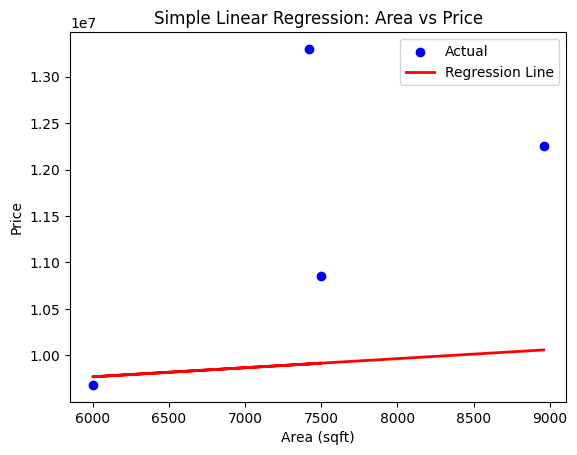

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()


In [16]:
# Use multiple features
X_multi = df[['area', 'bedrooms', 'bathrooms']]  # add more if needed
y_multi = df['price']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

print("Intercept:", model_multi.intercept_)
print("Coefficients:", list(zip(X_multi.columns, model_multi.coef_)))


Intercept: 9016252.750986278
Coefficients: [('area', np.float64(98.0086445631094)), ('bedrooms', np.float64(105616.7563671089)), ('bathrooms', np.float64(-119794.01643373992))]
